In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## **Dataset : Salud del sueño y estilo de vida** 🥱
### Primera parte

1. **Ejercicio 1:**
Realizar un análisis exploratorio del dataset proporcionado a su grupo.
* Identificar la cantidad de variables y observaciones presentes.
* Realizar un resumen estadístico univariado.
* Describir brevemente la naturaleza de los datos.
* Determinar las columnas con valores faltantes.
2. **Ejercicio 2:**
* Seleccionar variables de interés y realizar gráficas que representen conjuntamente varias
columnas en función de algún criterio seleccionado. Justificar la selección de las mismas y
explicar brevemente el resultado obtenido.
3. **Ejercicio 3:**
Realizar un preprocesamiento del conjunto de datos:
* Proponer una estrategia y llevarla adelante para el manejo de valores faltantes y
eliminación de duplicados.
* Considerar la normalización o estandarización de las variables numéricas y la
codificación de las variables categóricas para su posterior análisis.
* Realiza la “dummificación” de al menos una variable categórica y una variable
numérica
Documentar los pasos realizados y justificar las decisiones tomadas.


## **Características de las variables** 📑 
Person ID: An identifier for each individual.<br>
Gender: The gender of the person (Male/Female).<br>
Age: The age of the person in years.<br>
Occupation: The occupation or profession of the person.<br>
Sleep Duration (hours): The number of hours the person sleeps per day.<br>
Quality of Sleep (scale: 1-10): A subjective rating of the quality of sleep, ranging from 1 to 10.<br>
Physical Activity Level (minutes/day): The number of minutes the person engages in physical activity daily.<br>
Stress Level (scale: 1-10): A subjective rating of the stress level experienced by the person, ranging from 1 to 10.<br>
BMI Category: The BMI category of the person (e.g., Underweight, Normal, Overweight).<br>
Blood Pressure (systolic/diastolic): The blood pressure measurement of the person, indicated as systolic pressure over diastolic pressure.<br>
Heart Rate (bpm): The resting heart rate of the person in beats per minute.<br>
Daily Steps: The number of steps the person takes per day.<br>
Sleep Disorder: The presence or absence of a sleep disorder in the person (None, Insomnia, Sleep Apnea).<br>

# Parte 1

In [2]:
# Carga del dataset
df = pd.read_csv("health_mod.csv")
df.shape

(374, 14)

In [3]:
# duplicados = df.duplicated()
# filas_duplicadas = df[duplicados]
# filas_duplicadas

In [4]:
columnas = ["Unnamed: 0", "ID de persona", "Género", "Edad", "Ocupación", "Duración del sueño", "Calidad del sueño", "Nivel de actividad física", "Nivel de estrés", "Categoría de IMC", "Presión arterial", "Frecuencia cardíaca", "Pasos diarios", "Trastorno del sueño"]
df.columns = columnas
df.head(5)

,Unnamed: 0,ID de persona,Género,Edad,Ocupación,Duración del sueño,Calidad del sueño,Nivel de actividad física,Nivel de estrés,Categoría de IMC,Presión arterial,Frecuencia cardíaca,Pasos diarios,Trastorno del sueño
0,0,1,Male,27.0,Software Engineer,6.1,6,42,6.0,Overweight,126/83,77,4200,None
1,1,2,Male,28.0,Doctor,6.2,6,60,8.0,Normal,125/80,75,10000,None
2,2,3,Male,28.0,Doctor,6.2,6,60,8.0,Normal,125/80,75,10000,None
3,3,4,Male,28.0,Sales Representative,5.9,4,30,8.0,Obese,140/90,85,3000,Sleep Apnea
4,4,5,Male,28.0,Sales Representative,5.9,4,30,8.0,Obese,140/90,85,3000,Sleep Apnea


In [5]:
df.drop(["Unnamed: 0","ID de persona"], axis=1, inplace=True)
df.shape

(374, 12)

In [6]:
# Determinar columnas con valores nulos     
df.isnull().sum()

Género                       37
Edad                          7
Ocupación                     0
Duración del sueño           16
Calidad del sueño             0
Nivel de actividad física     0
Nivel de estrés              11
Categoría de IMC              0
Presión arterial              0
Frecuencia cardíaca           0
Pasos diarios                 0
Trastorno del sueño           0
dtype: int64

In [7]:
df.describe()

,Edad,Duración del sueño,Calidad del sueño,Nivel de actividad física,Nivel de estrés,Frecuencia cardíaca,Pasos diarios
count,367.000000,358.000000,374.000000,374.000000,363.000000,374.000000,374.000000
mean,42.250681,7.134916,7.312834,59.171123,5.377410,70.165775,6816.844920
std,8.679940,0.800129,1.196956,20.830804,1.772484,4.135676,1617.915679
min,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,36.000000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


In [8]:
print("Las columnas con valores nulos son: ", df.columns[df.isnull().any()])

Las columnas con valores nulos son:  Index(['Género', 'Edad', 'Duración del sueño', 'Nivel de estrés'], dtype='object')


In [9]:
df.dtypes

Género                        object
Edad                         float64
Ocupación                     object
Duración del sueño           float64
Calidad del sueño              int64
Nivel de actividad física      int64
Nivel de estrés              float64
Categoría de IMC              object
Presión arterial              object
Frecuencia cardíaca            int64
Pasos diarios                  int64
Trastorno del sueño           object
dtype: object

In [10]:
df_cuantitativo = df.select_dtypes(include=['int', 'float'])
df_categorico = df.select_dtypes(include=['object'])
df_cuantitativo

,Edad,Duración del sueño,Calidad del sueño,Nivel de actividad física,Nivel de estrés,Frecuencia cardíaca,Pasos diarios
0,27.0,6.1,6,42,6.0,77,4200
1,28.0,6.2,6,60,8.0,75,10000
2,28.0,6.2,6,60,8.0,75,10000
3,28.0,5.9,4,30,8.0,85,3000
4,28.0,5.9,4,30,8.0,85,3000
...,...,...,...,...,...,...,...
369,59.0,8.1,9,75,3.0,68,7000
370,59.0,8.0,9,75,3.0,68,7000
371,59.0,8.1,9,75,3.0,68,7000
372,59.0,8.1,9,75,3.0,68,7000


# Ejercicio 2

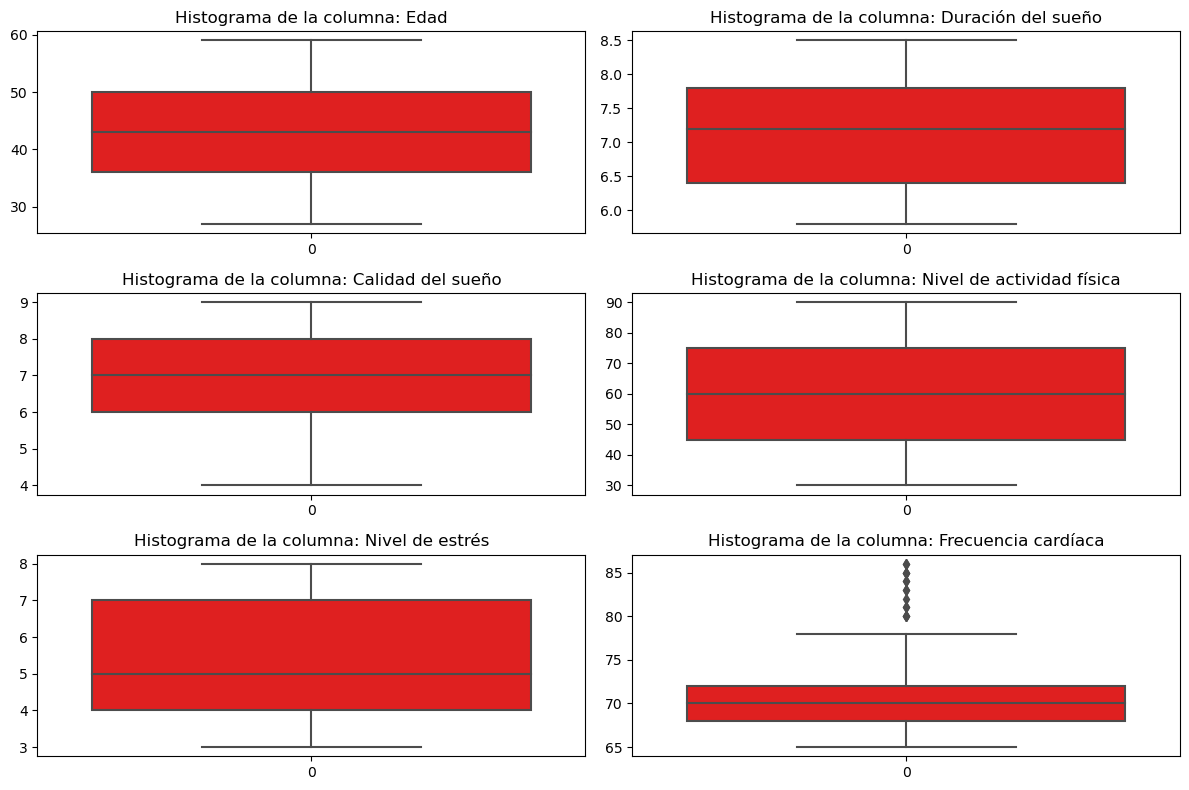

In [11]:
# Lista de columnas para generar los histogramas
columnas_histograma = ["Edad", "Duración del sueño", "Calidad del sueño", "Nivel de actividad física", "Nivel de estrés", "Frecuencia cardíaca"]

# Calcular el número de filas y columnas necesarias
num_filas = 3
num_columnas = 2

# Crear la figura y los subplots
fig, axes = plt.subplots(num_filas, num_columnas, figsize=(12, 8))

# Generar los histogramas para cada columna
for i, columna in enumerate(columnas_histograma):
    # Calcular las coordenadas del subplot actual
    fila = i // num_columnas
    col = i % num_columnas
    
    # Seleccionar el subplot actual
    ax = axes[fila, col]
    
    # Obtener los valores para el histograma
    valores = df_cuantitativo[columna]
    
    # Generar el histograma utilizando Seaborn en el subplot actual
    sns.boxplot(data=valores, ax=ax, color="red")
    ax.set_title(f"Histograma de la columna: {columna}")
    
# Ajustar el espaciado entre los subplots
plt.tight_layout()

# Mostrar los gráficos
plt.show()

## Imputacion de datos faltantes

In [12]:
# Imputar los valores nulos cuantitativos
df_cuantitativo["Nivel de estrés"].fillna(df_cuantitativo["Nivel de estrés"].mean(), inplace=True)
df_cuantitativo["Duración del sueño"].fillna(df_cuantitativo["Duración del sueño"].mean(), inplace=True)
df_cuantitativo["Edad"].fillna(df_cuantitativo["Edad"].mean(), inplace=True)
df_cuantitativo.describe()

,Edad,Duración del sueño,Calidad del sueño,Nivel de actividad física,Nivel de estrés,Frecuencia cardíaca,Pasos diarios
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,42.250681,7.134916,7.312834,59.171123,5.377410,70.165775,6816.844920
std,8.598107,0.782780,1.196956,20.830804,1.746152,4.135676,1617.915679
min,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,36.000000,6.500000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,42.250681,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


## Correlacion de variables

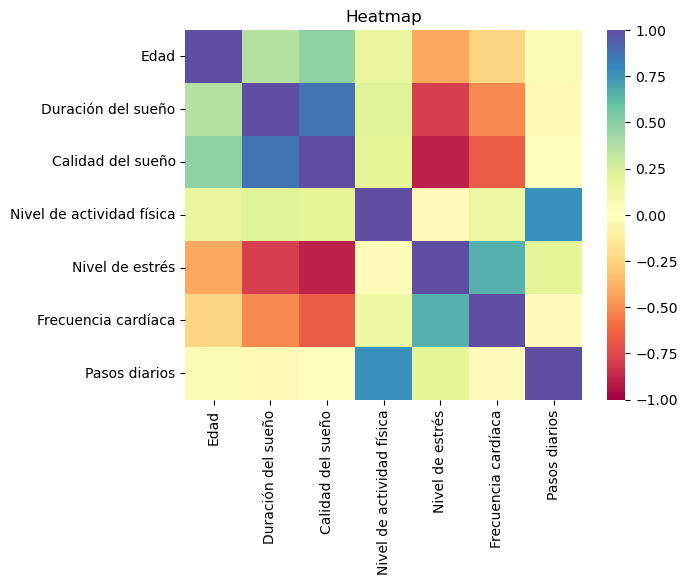

In [13]:
sns.heatmap(df_cuantitativo.corr(numeric_only=True), cmap='Spectral', vmin= -1)
plt.title('Heatmap')
plt.show()

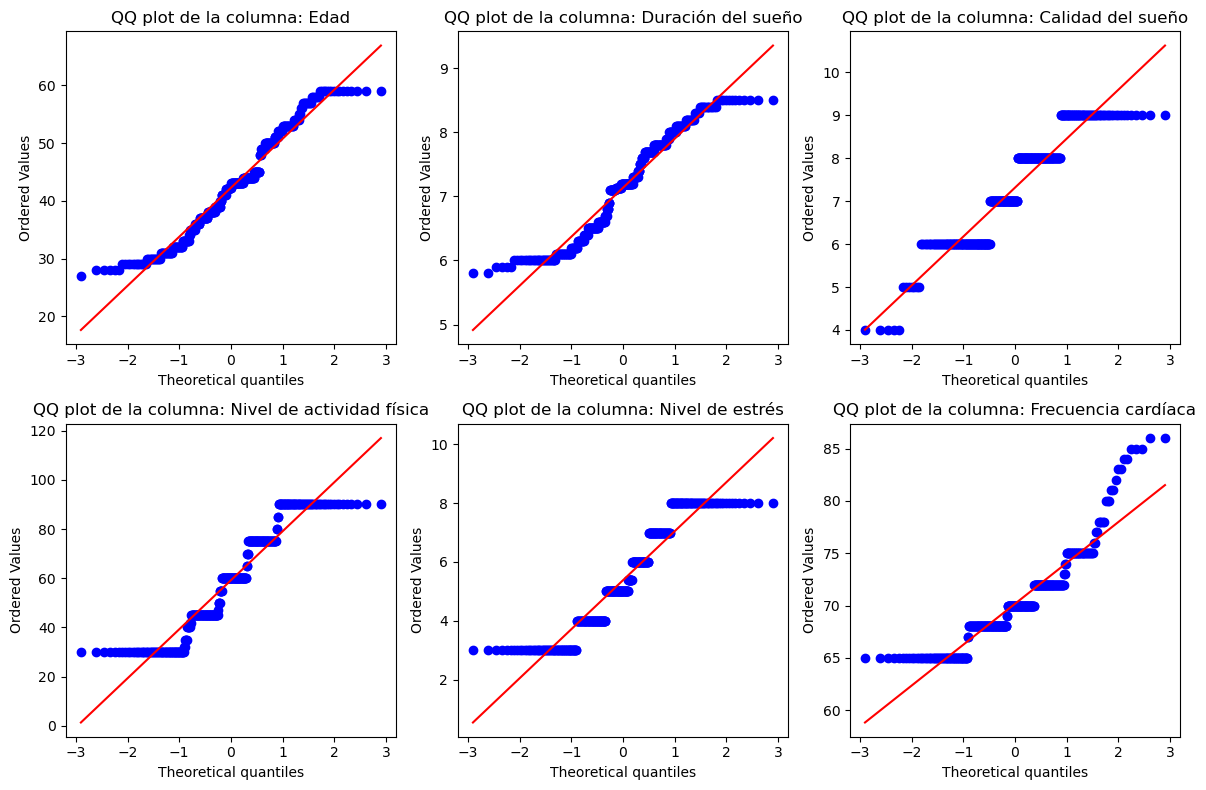

In [14]:
import scipy.stats as stats

columnas_de_interes = ["Edad", "Duración del sueño",	"Calidad del sueño",	"Nivel de actividad física", "Nivel de estrés",	"Frecuencia cardíaca"]

# Calcular el número de filas y columnas necesarias
num_filas = 2
num_columnas = 3

# Crear la figura y los subplots
fig, axes = plt.subplots(num_filas, num_columnas, figsize=(12, 8))

# Generar el gráfico QQ plot para cada columna
for i, columna in enumerate(columnas_de_interes):
    # Calcular las coordenadas del subplot actual
    fila = i // num_columnas
    col = i % num_columnas
    
    # Seleccionar el subplot actual
    ax = axes[fila, col]
    
    # Generar el gráfico QQ plot para la columna actual
    stats.probplot(df_cuantitativo.iloc[:, i], dist="norm", plot=ax)
    
    # Establecer el título del subplot actual
    ax.set_title(f"QQ plot de la columna: {columna}")
    
# Ajustar el espaciado entre los subplots
plt.tight_layout()

# Mostrar los gráficos
plt.show()

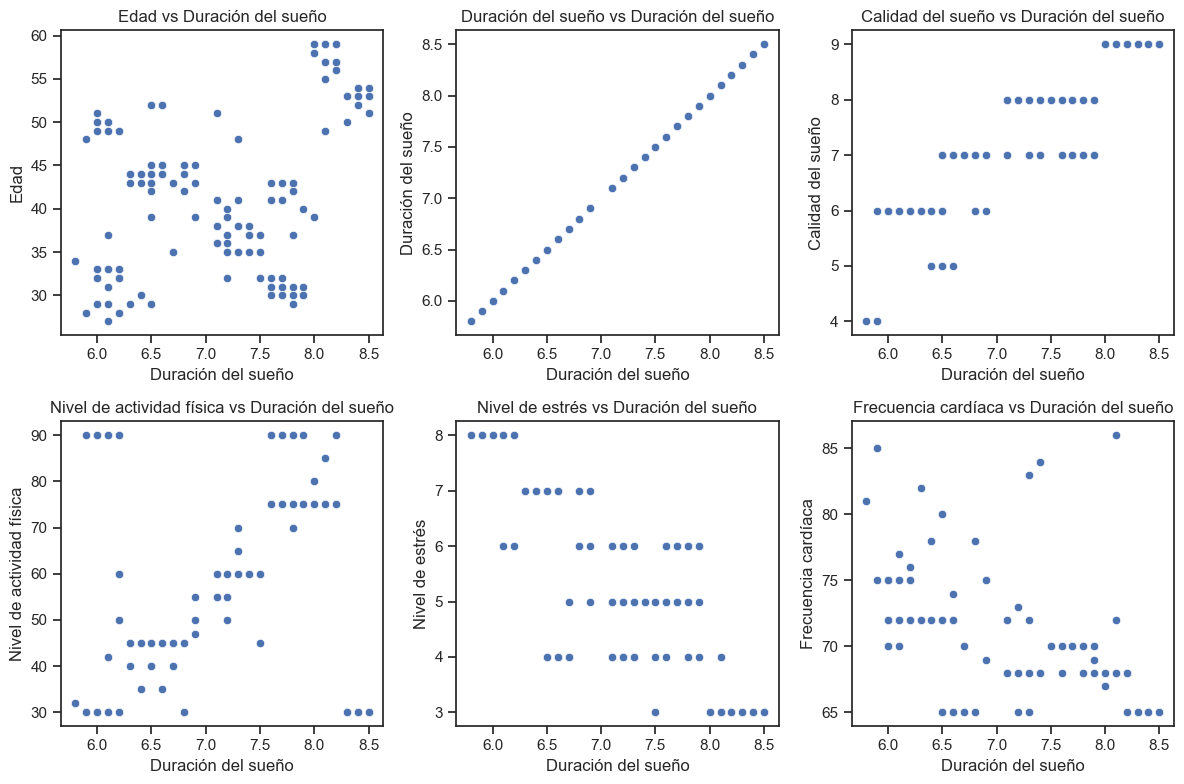

In [15]:
columnas_comparacion = ["Edad", "Duración del sueño","Calidad del sueño","Nivel de actividad física","Nivel de estrés","Frecuencia cardíaca"]

# Configurar el estilo de los gráficos
sns.set(style="ticks")

# Crear la figura y los subplots
fig, axes = plt.subplots(2, 3, figsize=(12, 8))

# Generar los gráficos de dispersión en los subplots correspondientes
for i, columna in enumerate(columnas_comparacion):
    # Calcular las coordenadas del subplot actual
    fila = i // 3
    col = i % 3
    
    # Seleccionar el subplot actual
    ax = axes[fila, col]
    
    # Generar el gráfico de dispersión en el subplot actual
    sns.scatterplot(x="Duración del sueño", y=columna, data=df, ax=ax)
    
    # Establecer el título del subplot actual
    ax.set_title(f"{columna} vs Duración del sueño")
    ax.set_xlabel("Duración del sueño")
    ax.set_ylabel(columna)

# Ajustar el espaciado entre los subplots
plt.tight_layout()

# Mostrar los gráficos
plt.show()

## Normalizar valores cuantitativos

In [16]:
# Lista de columnas a las que aplicar la transformación logarítmica
columnas_convertir = ["Edad","Duración del sueño",	"Calidad del sueño","Nivel de actividad física", "Nivel de estrés",	"Frecuencia cardíaca", "Pasos diarios"]

# Crear un nuevo DataFrame con las columnas transformadas
data_t = df_cuantitativo.assign(**{f'{columna}_log': np.log(df_cuantitativo[columna]) for columna in columnas_convertir})
data_transformado = data_t[["Edad_log", "Duración del sueño_log","Calidad del sueño_log","Nivel de actividad física_log", "Nivel de estrés_log","Frecuencia cardíaca_log","Pasos diarios_log"]]
data_transformado

,Edad_log,Duración del sueño_log,Calidad del sueño_log,Nivel de actividad física_log,Nivel de estrés_log,Frecuencia cardíaca_log,Pasos diarios_log
0,3.295837,1.808289,1.791759,3.737670,1.791759,4.343805,8.342840
1,3.332205,1.824549,1.791759,4.094345,2.079442,4.317488,9.210340
2,3.332205,1.824549,1.791759,4.094345,2.079442,4.317488,9.210340
3,3.332205,1.774952,1.386294,3.401197,2.079442,4.442651,8.006368
4,3.332205,1.774952,1.386294,3.401197,2.079442,4.442651,8.006368
...,...,...,...,...,...,...,...
369,4.077537,2.091864,2.197225,4.317488,1.098612,4.219508,8.853665
370,4.077537,2.079442,2.197225,4.317488,1.098612,4.219508,8.853665
371,4.077537,2.091864,2.197225,4.317488,1.098612,4.219508,8.853665
372,4.077537,2.091864,2.197225,4.317488,1.098612,4.219508,8.853665


### Estandarizar con Sklearn

In [17]:
# Importar la librería necesaria
from sklearn.preprocessing import StandardScaler

# Lista de columnas a las que aplicar la normalización Z-Score
columnas_convertir = ["Edad", "Duración del sueño", "Calidad del sueño", "Nivel de actividad física", "Nivel de estrés", "Frecuencia cardíaca", "Pasos diarios"]

# Crear un objeto StandardScaler
scaler = StandardScaler()

# Aplicar la normalización Z-Score a las columnas
data_transformado = df_cuantitativo[columnas_convertir]
data_transformado = pd.DataFrame(scaler.fit_transform(data_transformado), columns=columnas_convertir)

# Imprimir el DataFrame con las columnas normalizadas
data_transformado


,Edad,Duración del sueño,Calidad del sueño,Nivel de actividad física,Nivel de estrés,Frecuencia cardíaca,Pasos diarios
0,-1.776101,-1.323875,-1.098280,-0.825418,0.357027,1.654719,-1.619584
1,-1.659641,-1.195954,-1.098280,0.039844,1.503937,1.170474,1.970077
2,-1.659641,-1.195954,-1.098280,0.039844,1.503937,1.170474,1.970077
3,-1.659641,-1.579717,-2.771424,-1.402260,1.503937,3.591698,-2.362273
4,-1.659641,-1.579717,-2.771424,-1.402260,1.503937,3.591698,-2.362273
...,...,...,...,...,...,...,...
369,1.950634,1.234545,1.411435,0.760896,-1.363338,-0.524383,0.113356
370,1.950634,1.106624,1.411435,0.760896,-1.363338,-0.524383,0.113356
371,1.950634,1.234545,1.411435,0.760896,-1.363338,-0.524383,0.113356
372,1.950634,1.234545,1.411435,0.760896,-1.363338,-0.524383,0.113356


In [18]:
data_transformado.describe()

,Edad,Duración del sueño,Calidad del sueño,Nivel de actividad física,Nivel de estrés,Frecuencia cardíaca,Pasos diarios
count,3.740000e+02,3.740000e+02,3.740000e+02,3.740000e+02,3.740000e+02,3.740000e+02,3.740000e+02
mean,1.519878e-16,-5.509556e-16,2.469801e-16,-3.324732e-17,-9.499234e-17,-1.377389e-15,-9.499234e-17
std,1.001340e+00,1.001340e+00,1.001340e+00,1.001340e+00,1.001340e+00,1.001340e+00,1.001340e+00
min,-1.776101e+00,-1.707638e+00,-2.771424e+00,-1.402260e+00,-1.363338e+00,-1.250750e+00,-2.362273e+00
25%,-7.279573e-01,-8.121911e-01,-1.098280e+00,-6.812078e-01,-7.898828e-01,-5.243827e-01,-7.531140e-01
50%,0.000000e+00,8.325584e-02,-2.617083e-01,3.984423e-02,-2.164279e-01,-4.013793e-02,1.133560e-01
75%,9.024893e-01,8.507818e-01,5.748635e-01,7.608963e-01,9.304819e-01,4.441068e-01,7.322631e-01
max,1.950634e+00,1.746229e+00,1.411435e+00,1.481948e+00,1.503937e+00,3.833820e+00,1.970077e+00


## Dumminificacion

In [19]:
df_categorico.head(5)


,Género,Ocupación,Categoría de IMC,Presión arterial,Trastorno del sueño
0,Male,Software Engineer,Overweight,126/83,None
1,Male,Doctor,Normal,125/80,None
2,Male,Doctor,Normal,125/80,None
3,Male,Sales Representative,Obese,140/90,Sleep Apnea
4,Male,Sales Representative,Obese,140/90,Sleep Apnea


In [20]:
print(df_categorico["Categoría de IMC"].unique())
print(df_categorico["Ocupación"].unique())
print(df_categorico["Trastorno del sueño"].unique())

['Overweight' 'Normal' 'Obese' 'Normal Weight']
['Software Engineer' 'Doctor' 'Sales Representative' 'Teacher' 'Nurse'
 'Engineer' 'Accountant' 'Scientist' 'Lawyer' 'Salesperson' 'Manager']
['None' 'Sleep Apnea' 'Insomnia']


In [21]:
# Dummificar la columna categórica
df_dummified = pd.get_dummies(df_categorico['Trastorno del sueño'])

# Concatenar el DataFrame original con el DataFrame dummificado
df_final = pd.concat([df_categorico, df_dummified], axis=1)
df_final

,Género,Ocupación,Categoría de IMC,Presión arterial,Trastorno del sueño,Insomnia,None,Sleep Apnea
0,Male,Software Engineer,Overweight,126/83,None,0,1,0
1,Male,Doctor,Normal,125/80,None,0,1,0
2,Male,Doctor,Normal,125/80,None,0,1,0
3,Male,Sales Representative,Obese,140/90,Sleep Apnea,0,0,1
4,Male,Sales Representative,Obese,140/90,Sleep Apnea,0,0,1
...,...,...,...,...,...,...,...,...
369,Female,Nurse,Overweight,140/95,Sleep Apnea,0,0,1
370,Female,Nurse,Overweight,140/95,Sleep Apnea,0,0,1
371,Female,Nurse,Overweight,140/95,Sleep Apnea,0,0,1
372,Female,Nurse,Overweight,140/95,Sleep Apnea,0,0,1


## Graficos categoricos

In [22]:
df.isnull()

,Género,Edad,Ocupación,Duración del sueño,Calidad del sueño,Nivel de actividad física,Nivel de estrés,Categoría de IMC,Presión arterial,Frecuencia cardíaca,Pasos diarios,Trastorno del sueño
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
369,False,False,False,False,False,False,False,False,False,False,False,False
370,False,False,False,False,False,False,False,False,False,False,False,False
371,False,False,False,False,False,False,False,False,False,False,False,False
372,False,False,False,False,False,False,False,False,False,False,False,False


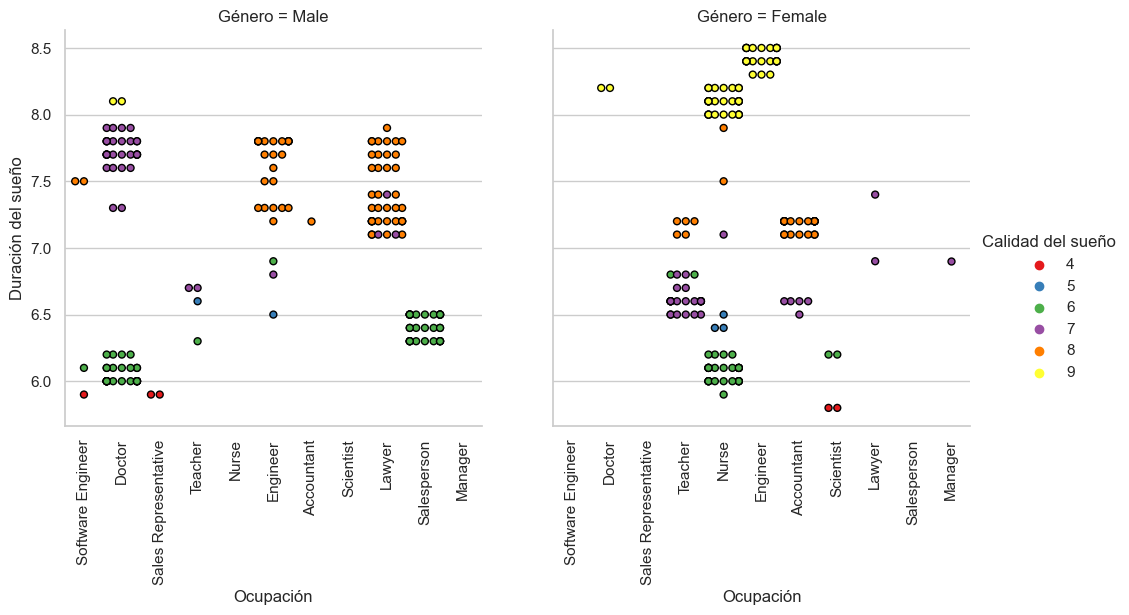

In [23]:
import warnings

# Desactivar las advertencias de tipo UserWarning
warnings.filterwarnings("ignore", category=UserWarning)

sns.set(style="whitegrid")

catplot = sns.catplot(x="Ocupación", y="Duración del sueño", data=df, kind="swarm", hue="Calidad del sueño", col="Género", palette="Set1", linewidth=1, edgecolor="black")

# Acceder a los Axes de cada subplot
axes = catplot.axes.flatten()

# Rotar los xticks en cada subplot
for ax in axes:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

plt.show()

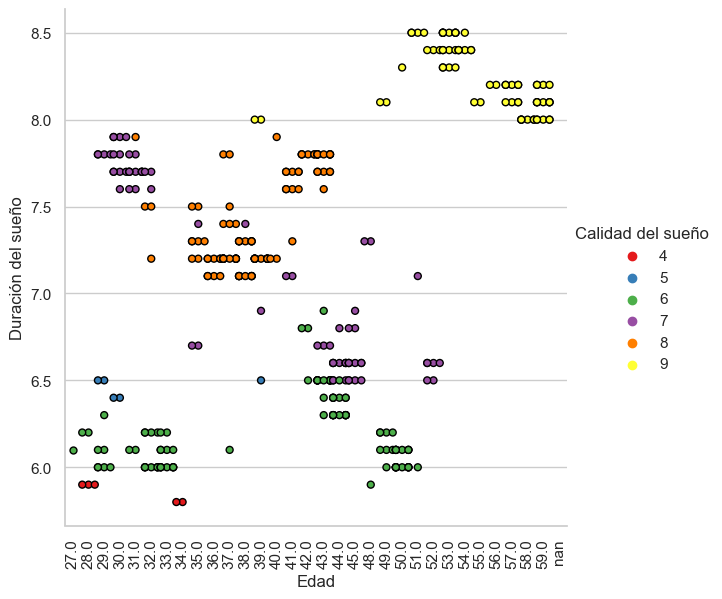

In [24]:
import warnings

# Desactivar las advertencias de tipo UserWarning
warnings.filterwarnings("ignore", category=UserWarning)

sns.set(style="whitegrid")

catplot = sns.catplot(x="Edad", y="Duración del sueño", data=df, kind="swarm", hue="Calidad del sueño", palette="Set1", linewidth=1, edgecolor="black", height=6)

# Acceder a los Axes de cada subplot
axes = catplot.axes.flatten()

# Rotar los xticks en cada subplot
for ax in axes:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)    

plt.show()

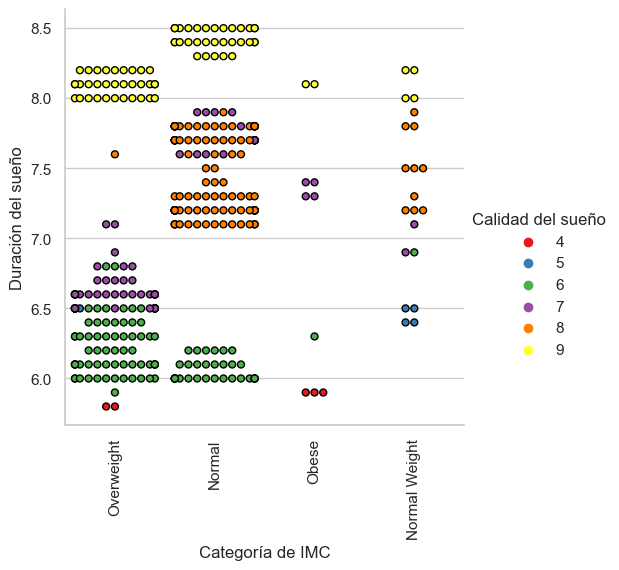

In [25]:
import warnings

# Desactivar las advertencias de tipo UserWarning
warnings.filterwarnings("ignore", category=UserWarning)

sns.set(style="whitegrid")

catplot = sns.catplot(x="Categoría de IMC", y="Duración del sueño", data=df, kind="swarm", hue="Calidad del sueño", palette="Set1", linewidth=1, edgecolor="black")

# Acceder a los Axes de cada subplot
axes = catplot.axes.flatten()

# Rotar los xticks en cada subplot
for ax in axes:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

plt.show()

# PCA

In [26]:
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
X = data_transformado.values
X = imputer.fit_transform(X)


In [27]:
pca = PCA()
pca.fit(X)

PCA()

In [28]:
componentes_principales = pca.components_
varianza_explicada = pca.explained_variance_ratio_
varianza_explicada_acumulativa = np.cumsum(varianza_explicada)
varianza_explicada_acumulativa

array([0.49525473, 0.75560608, 0.86806275, 0.95258086, 0.97755019,
       0.99057599, 1.        ])

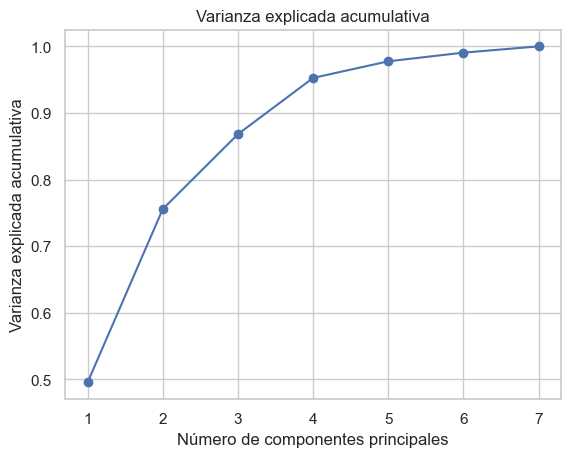

In [29]:
varianza_explicada_acumulativa = np.cumsum(varianza_explicada)

# Crear el gráfico de la varianza explicada acumulativa
plt.plot(range(1, len(varianza_explicada_acumulativa) + 1), varianza_explicada_acumulativa, marker='o')
plt.xlabel('Número de componentes principales')
plt.ylabel('Varianza explicada acumulativa')
plt.title('Varianza explicada acumulativa')
plt.grid(True)
plt.show()

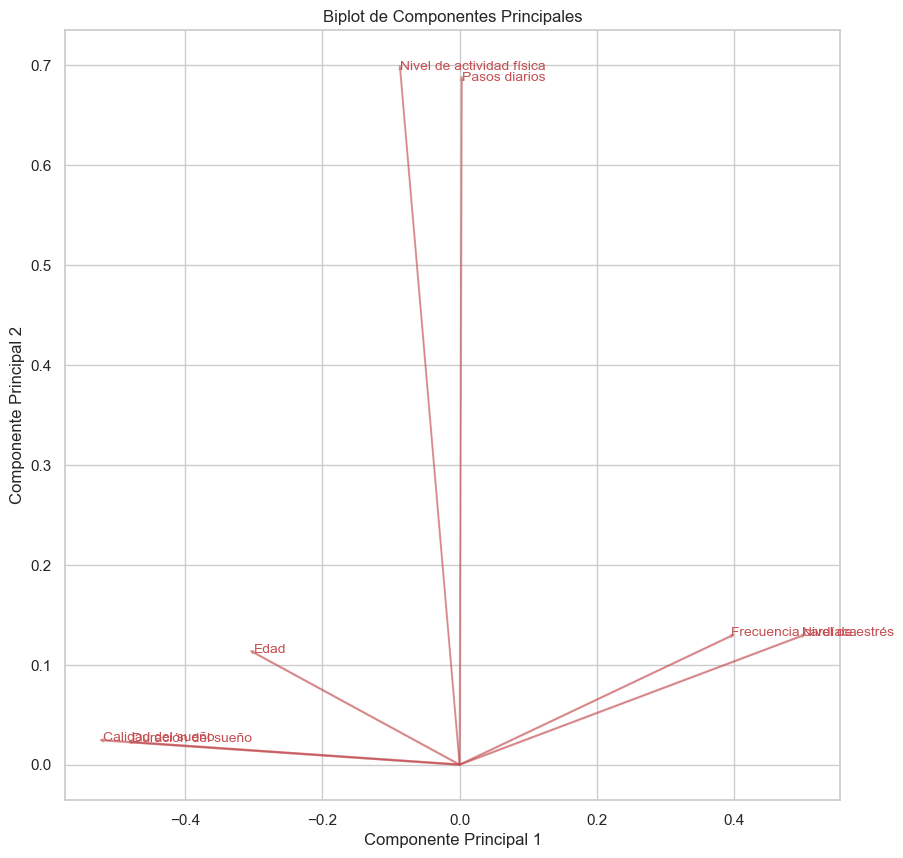

In [34]:
fig, ax = plt.subplots(figsize=(10, 10))

# # Graficar las muestras
# ax.scatter(X[:, 0], X[:, 1], color='b')

# Agregar las proyecciones de las variables
for i, (x, y) in enumerate(componentes_principales[:2, :].T):
    ax.arrow(0, 0, x, y, color='r', alpha=0.5)
    ax.text(x, y, data_transformado.columns[i], color='r', fontsize=10)

# Configurar los ejes y etiquetas
ax.set_xlabel('Componente Principal 1')
ax.set_ylabel('Componente Principal 2')
ax.set_title('Biplot de Componentes Principales')

plt.savefig('biplot3.png')
plt.grid(True)
plt.show()

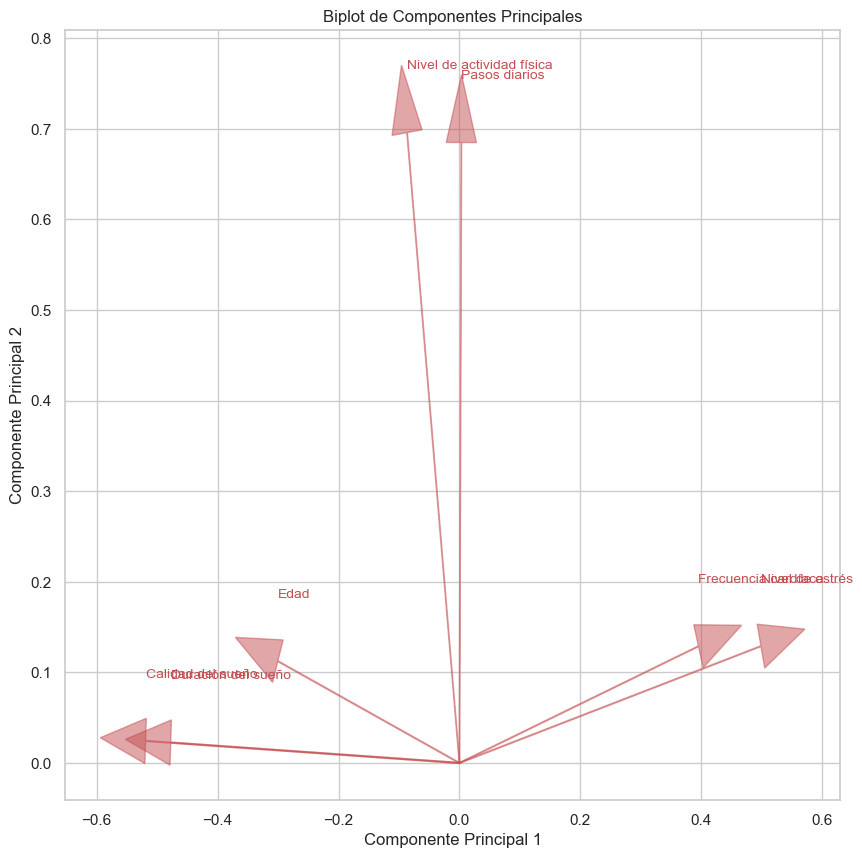

In [42]:
fig, ax = plt.subplots(figsize=(10, 10))

# Agregar las proyecciones de las variables
for i, (x, y) in enumerate(componentes_principales[:2, :].T):
    ax.arrow(0, 0, x, y, color='r', alpha=0.5, head_width=0.05)
    ax.text(x+0.0, y+0.07, data_transformado.columns[i], color='r', fontsize=10)  # Ajustar los valores de desplazamiento según tus necesidades

# Configurar los ejes y etiquetas
ax.set_xlabel('Componente Principal 1')
ax.set_ylabel('Componente Principal 2')
ax.set_title('Biplot de Componentes Principales')

plt.savefig('biplot3.png')
plt.grid(True)
plt.show()

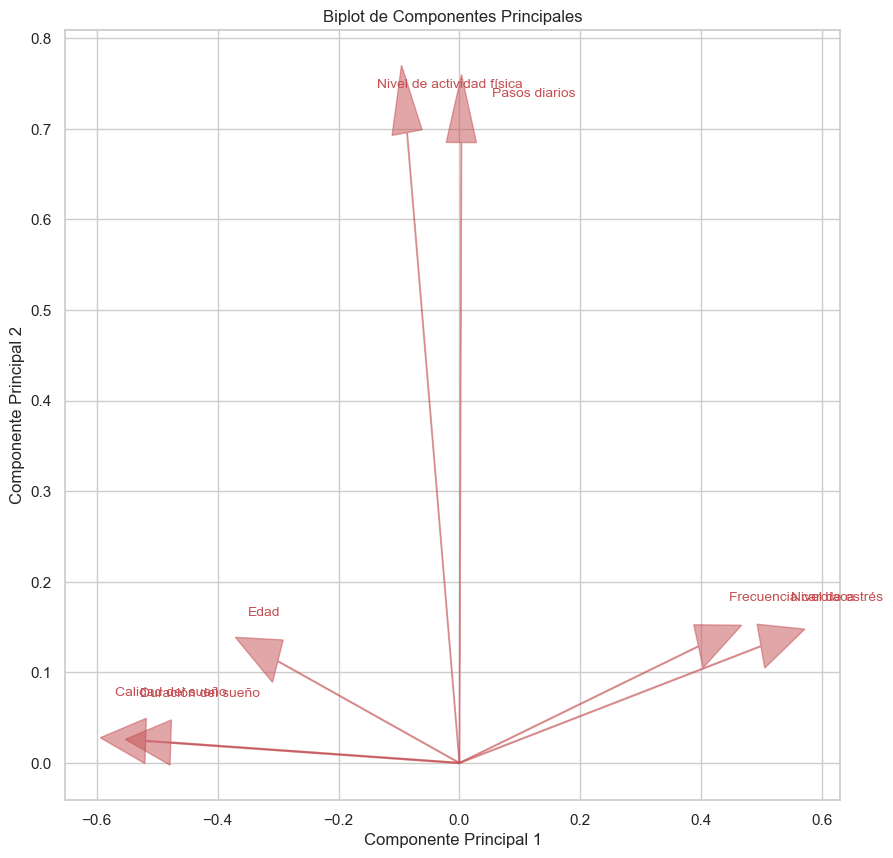

In [49]:
fig, ax = plt.subplots(figsize=(10, 10))

# Agregar las proyecciones de las variables
for i, (x, y) in enumerate(componentes_principales[:2, :].T):
    ax.arrow(0, 0, x, y, color='r', alpha=0.5, head_width=0.05)
    dx = 0.05 * np.sign(x)
    dy = 0.05 * np.sign(y)
    ax.text(x + dx, y + dy, data_transformado.columns[i], color='r', fontsize=10)  

# Configurar los ejes y etiquetas
ax.set_xlabel('Componente Principal 1')
ax.set_ylabel('Componente Principal 2')
ax.set_title('Biplot de Componentes Principales')

plt.savefig('biplot3.png')
plt.grid(True)
plt.show()

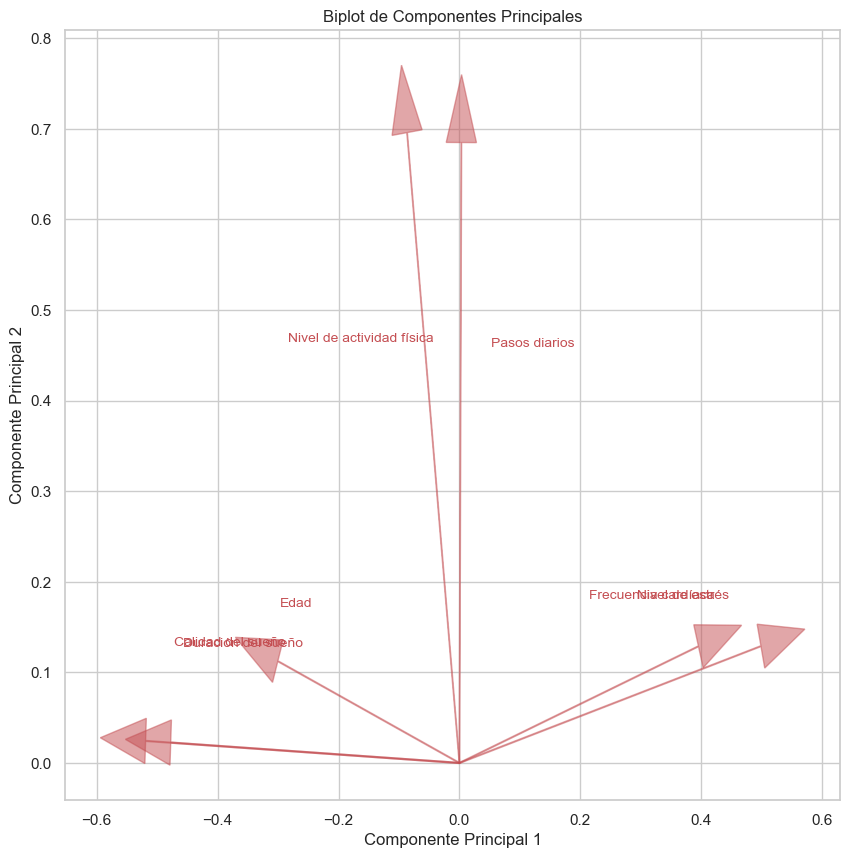

In [51]:
fig, ax = plt.subplots(figsize=(10, 10))

# Ajustar la separación entre las etiquetas
separacion = 0.12

# Agregar las proyecciones de las variables
for i, (x, y) in enumerate(componentes_principales[:2, :].T):
    ax.arrow(0, 0, x, y, color='r', alpha=0.5, head_width=0.05)
    centroid_x = x/2  # Coordenada x del centroide
    centroid_y = y/2  # Coordenada y del centroide
    offset_x = separacion if x >= 0 else -separacion  # Separación en la coordenada x
    offset_y = separacion if y >= 0 else -separacion  # Separación en la coordenada y
    ax.text(centroid_x + offset_x, centroid_y + offset_y, data_transformado.columns[i], color='r', fontsize=10, ha='center', va='center')  

# Configurar los ejes y etiquetas
ax.set_xlabel('Componente Principal 1')
ax.set_ylabel('Componente Principal 2')
ax.set_title('Biplot de Componentes Principales')

plt.savefig('biplot3.png')
plt.grid(True)
plt.show()


ValueError: too many values to unpack (expected 2)

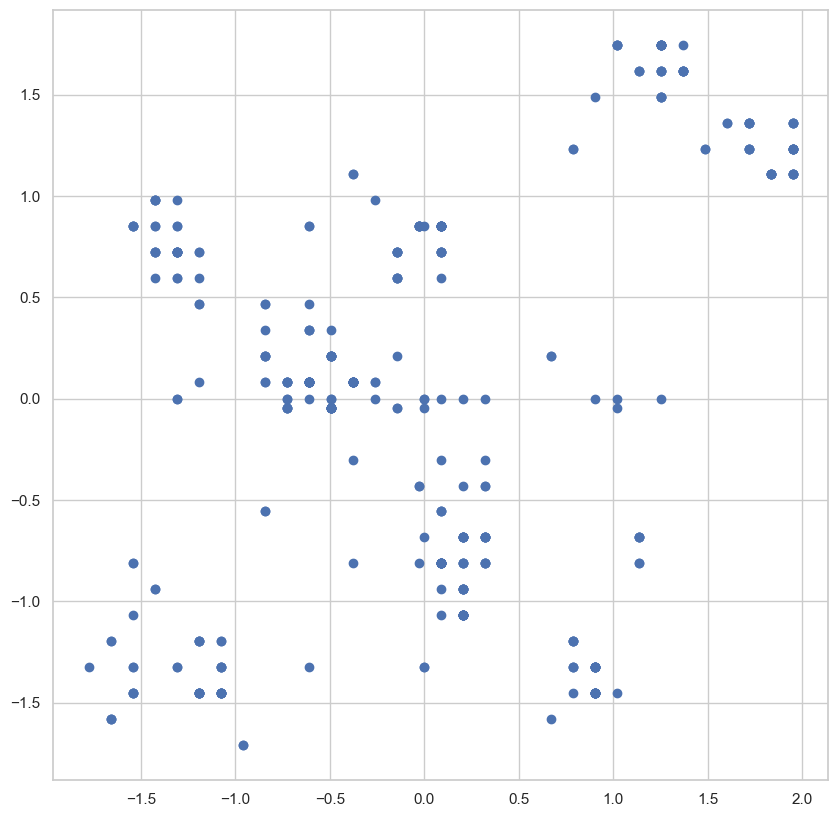

In [31]:
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

imputer = SimpleImputer(strategy='mean')
X = data_transformado.values
X = imputer.fit_transform(X)
pca = PCA()
pca.fit(X)
componentes_principales = pca.components_

# Crear el gráfico de dispersión con las proyecciones de las variables
fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(X[:, 0], X[:, 1], color='b')

# Agregar las proyecciones de las variables
for i, (x, y) in enumerate(componentes_principales.T):
    ax.arrow(0, 0, x, y, color='r', alpha=0.5)
    ax.text(x, y, data_transformado.columns[i], color='r', fontsize=10)

# Configurar los ejes y etiquetas
ax.set_xlabel('Componente Principal 1')
ax.set_ylabel('Componente Principal 2')
ax.set_title('Biplot de Componentes Principales')

# Guardar el gráfico en un archivo
plt.savefig('biplot.png')

# Mostrar el gráfico en pantalla
plt.show()

